# Hollywood Movies 

## Data
Dati presi da: [`HollywoodMovies`](https://github.com/reisanar/datasets/blob/master/HollywoodMovies.csv) 



## Features
  [`HollywoodMovies`](https://github.com/reisanar/datasets/blob/master/HollywoodMovies.csv) 
  </summary> Information for 136 movies released from Hollywood in 2011.
  
 Variables    |  Description
------------  |----------------------------------------------------------------
`Movie`      | Title of movie
`LeadStudio`        | Studio that released the movie
`RottenTomatoes` | Rotten Tomatoes rating (reviewers)
`AudienceScore`  | Audience rating (via Rotten Tomatoes)
`Story`      | General theme - one of 21 themes
`Genre`        | Type of Movie: Action, Adventure, Animation, Comedy, Drama, Fantasy, Horror, Romance, or Thriller
`TheatersOpenWeek`| Number of screens for opening weekend
`BOAverageOpenWeek`  | Average box office income per theater - opening weekend
`DomesticGross`      | Gross income for domestic viewers (in millions)
`ForeignGross`        | Gross income for foreign viewers (in millions)
`WorldGross` | Gross income for all viewers (in millions)
`Budget`  | Production budget (in millions)
`Profitability`      | WorldGross/Budget
`OpeningWeekend`        | Opening weekend gross (in millions)

## Analizzo gli attributi:
### Genere, Lead studio, Story
Forse tra questi potrebbe interessarmi quale è il genere che produce più film
### Economici
`DomesticGross` indica gli incassi negli USA, mentre `ForeignGross` Incasso all'estero, la loro somma è `WorldGross`
`Budget` è il costo di produzione, mentre `Profitability` indica **quanto un film ha moltiplicato il suo budget**, in pratica quante vole ha ripagato il suo costo.

Quindi potrei usare `WorldGross` per capire quanto hanno guadaganto, ma `Profitability` dovrebbe darmi una scala del guadagno in relazione alla scala del Budget (credo 🤔)

`OpeningWeekend`  indica quanto ha incassato la prima settimana, potrebbe essere indice di hype, e quindi di buona promozione del film prima della sua uscita?, potrebbe dipendere dagli attori?

### Score di review
Potrebbe essere interessante capire quanto si differiscono le review dei critici professionisti rispetto alle critiche del pubblico.
`RottenTomatoes` e `AudienceScore`

### Temporali e numero di sale
`TheatersOpenWeek` In quante sale è stato proiettato durante il primo weekend, potrrebbe essere interessante relazionarlo con `OpeningWeekend`, o capire se solo i film con grosso `Budget` hanno tante sale? Se altro potrebbe essere super produzione, se basso di nicchia.
`BOAverageOpenWeek` indica quanto ha incassato in media ogni sala nel primo weekend. Se alto ha attivarto in sala tanta gente

## Preparing Tools
Userò panda, matplotlib e seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# per far mostrare i grafici in linea
%matplotlib inline 

Importo la funzione che ho deciso di testare **simulando TDD**

In [1]:
from movies_analysis import group_movies_by_year_genre

In [4]:
# Import i dati e creo un data frame
url = "https://raw.githubusercontent.com/reisanar/datasets/refs/heads/master/HollywoodMovies.csv"

df = pd.read_csv(url)

df.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


In [9]:
# Controllo la forma del data frame, per vedere quante righe e colonne, quindi quanti samples e attributi:
df.shape

(970, 16)

## Data Exploration
controllo il data frame, per cercare eventuali valori nulli, ma al momento non applico nessuna tecnica di **filling/imputing**:

In [12]:
df.isna().sum()

Movie                 0
LeadStudio            9
RottenTomatoes       57
AudienceScore        63
Story               329
Genre               279
TheatersOpenWeek     21
OpeningWeekend        1
BOAvgOpenWeekend     25
DomesticGross         0
ForeignGross         94
WorldGross           56
Budget               73
Profitability        74
OpenProfit           75
Year                  0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie             970 non-null    object 
 1   LeadStudio        961 non-null    object 
 2   RottenTomatoes    913 non-null    float64
 3   AudienceScore     907 non-null    float64
 4   Story             641 non-null    object 
 5   Genre             691 non-null    object 
 6   TheatersOpenWeek  949 non-null    float64
 7   OpeningWeekend    969 non-null    float64
 8   BOAvgOpenWeekend  945 non-null    float64
 9   DomesticGross     970 non-null    float64
 10  ForeignGross      876 non-null    float64
 11  WorldGross        914 non-null    float64
 12  Budget            897 non-null    float64
 13  Profitability     896 non-null    float64
 14  OpenProfit        895 non-null    float64
 15  Year              970 non-null    int64  
dtypes: float64(11), int64(1), object(4)
memory u

In [14]:
df.describe()

,RottenTomatoes,AudienceScore,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
count,913.000000,907.000000,949.000000,969.000000,945.000000,970.000000,876.000000,914.000000,897.000000,896.000000,895.000000,970.000000
mean,51.707558,61.271224,2495.246575,20.620826,8562.593651,68.162544,101.237419,169.009945,56.117168,384.620100,62.223575,2010.236082
std,26.821268,16.602457,1164.223356,25.338689,10645.135565,80.409969,155.987696,227.744380,53.755914,631.666012,159.713218,1.954840
min,0.000000,19.000000,1.000000,0.010000,28.000000,0.060000,0.000000,0.100000,0.000000,2.300000,0.160000,2007.000000
25%,28.000000,49.000000,2054.000000,5.300000,3528.000000,17.565000,16.667500,38.357500,20.000000,150.020000,19.505000,2009.000000
50%,52.000000,61.000000,2798.000000,13.150000,5983.000000,40.415000,46.655000,88.180000,35.000000,254.820000,34.610000,2010.000000
75%,75.000000,74.000000,3285.000000,26.200000,9790.000000,89.252500,111.908750,202.310000,75.000000,417.987500,58.375000,2012.000000
max,99.000000,96.000000,4468.000000,207.440000,147262.000000,760.500000,2021.000000,2781.500000,300.000000,10175.850000,3373.000000,2013.000000


# Voglio visualizzare il numero di film usciti ogni anno, raggruppati per genere.


In [129]:
# posso vedere in totale quale è il genere con più film prodotti
df["Genre"].value_counts()

Genre
Comedy         177
Action         166
Drama          109
Horror          52
Animation       51
Thriller        35
Adventure       30
Romance         20
Crime           15
Biography       14
Documentary      7
Fantasy          6
Mystery          5
Musical          4
Name: count, dtype: int64

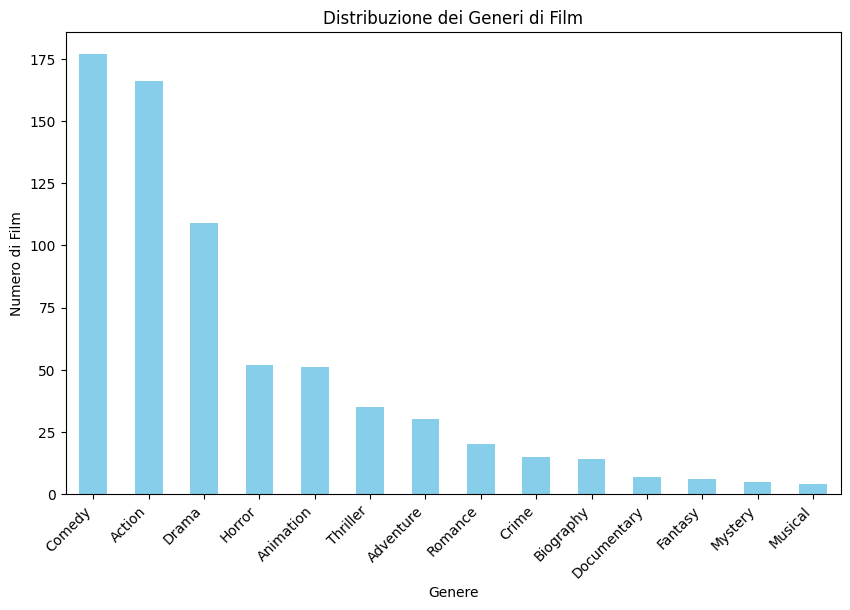

In [132]:
genre_counts = df["Genre"].value_counts()

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar", color="skyblue")

# Ruota le etichette sull'asse X per renderle leggibili
plt.xticks(rotation=45, ha="right")

# Aggiungi titolo e etichette
plt.title("Distribuzione dei Generi di Film")
plt.xlabel("Genere")
plt.ylabel("Numero di Film")

# Mostra il grafico
plt.show()

In totale vengono prodotti più film commedia, vediamo se è lo stesso raggruppandoli per annualità.

**Uso la funzione importata dal modulo che supera i test** `group_movies_by_year_genre`

In [5]:
# Raggruppa per Anno e Genere e conta il numero di film
# movies_per_year_genre = df.groupby(["Year", "Genre"]).size().reset_index(name="Count")

# sostituisco con l'import della funzione creata in file separato

movies_per_year_genre = group_movies_by_year_genre(df)

# Controlla i primi valori
movies_per_year_genre.head(20)

,Year,Genre,Count
0,2007,Action,20
1,2007,Adventure,3
2,2007,Animation,7
3,2007,Biography,1
4,2007,Comedy,21
5,2007,Documentary,1
6,2007,Drama,9
7,2007,Fantasy,1
8,2007,Horror,8
9,2007,Musical,3


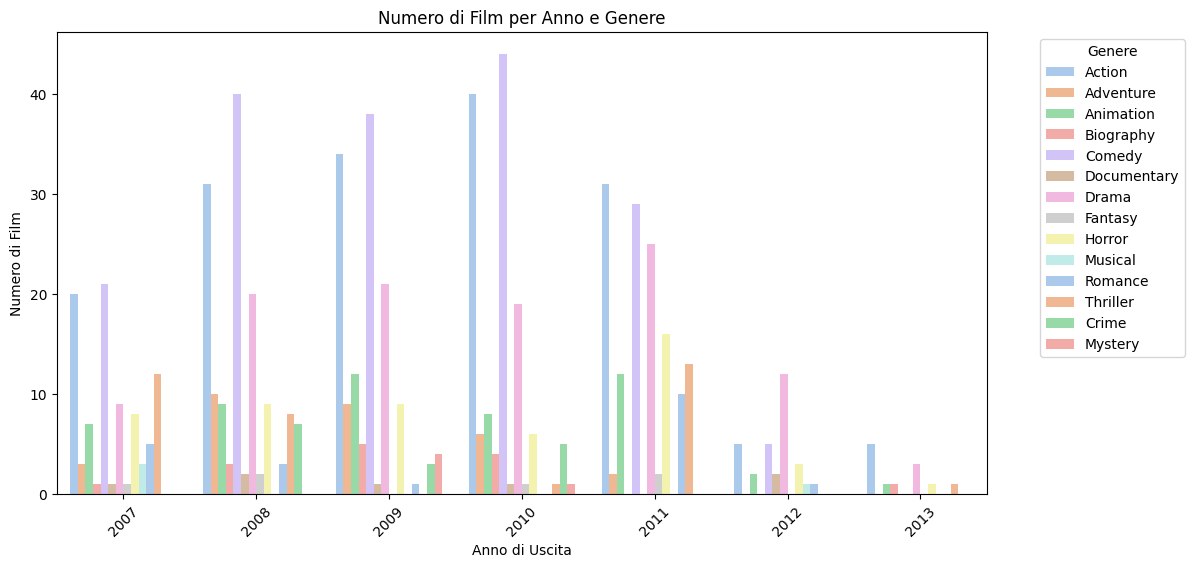

In [123]:
# Plotto usando la nuova tabella creata
plt.figure(figsize=(12, 6))
sns.barplot(data=movies_per_year_genre, x="Year", y="Count", hue="Genre", palette="pastel")

# Personalizziamo il grafico
plt.title("Numero di Film per Anno e Genere")
plt.xlabel("Anno di Uscita")
plt.ylabel("Numero di Film")
plt.xticks(rotation=45)
plt.legend(title="Genere", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.show()

Ha quasi sempre vinto la commedia, tranne più recentemente, dove si è fatto strada il drama, e action.
**Sembra anche che vengano prodotti molti meno film dal 2011**

## Voglio visualizzare il genere di film che produce i film più costosi!

In [133]:
# creo una tabella che raggruppi per genere e budget totale 
movies_per_budget_genre = df.groupby("Genre")["Budget"].sum().reset_index()

# e creo la top 10 per budget
movies_per_budget_genre = movies_per_budget_genre.sort_values(by="Budget", ascending=False)

movies_per_budget_genre.head(10)  # Mostra i 10 generi con il budget più alto

,Genre,Budget
0,Action,14081.0
4,Comedy,6235.5
2,Animation,5549.5
7,Drama,2793.9
1,Adventure,2410.5
13,Thriller,2031.2
9,Horror,1108.0
12,Romance,737.0
5,Crime,499.8
3,Biography,491.0


## Plotto la tabella dei generi più costosi (TOP 10)

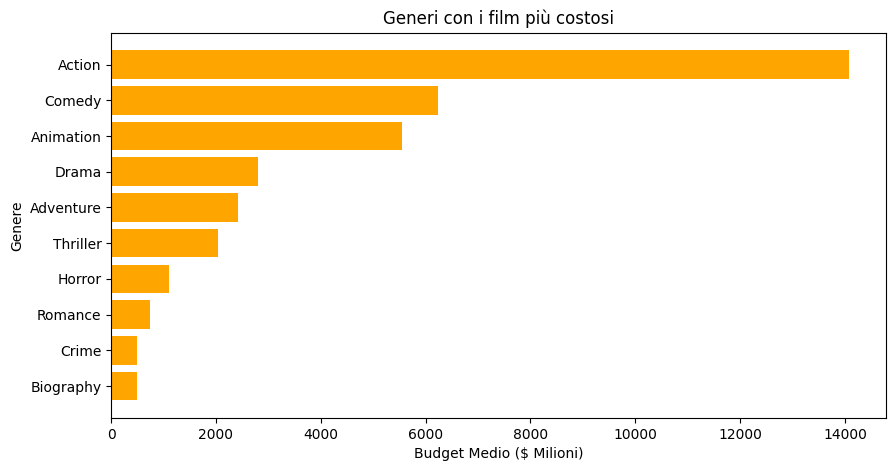

In [116]:
# Prendi i primi 10 generi con il budget più alto
top_genres = movies_per_budget_genre.head(10)

# Creazione del grafico a barre
plt.figure(figsize=(10, 5))
plt.barh(top_genres["Genre"], top_genres["Budget"], color="orange")
plt.xlabel("Budget Medio ($ Milioni)")
plt.ylabel("Genere")
plt.title("Generi con i film più costosi")
plt.gca().invert_yaxis()  # Inverte l'asse per mostrare il più costoso in alto

plt.show()

## Voglio vedere i film Action con maggiore budget, e valutare come sono andati (top 10):

In [117]:
action_movies = df[df["Genre"] == "Action"].sort_values(by="Budget", ascending=False)

# Mostra i 10 film d'azione con il budget più alto
action_movies.head(10)

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year,ScoreDifference
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.70,26302.0,309.42,654.00,963.420,300.0,321.14,38.23,2007,29.0
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.10,35540.0,336.53,554.34,890.870,258.0,345.30,58.57,2007,7.0
586,Pirates of the Caribbean:On Stranger Tides,Disney,34.0,61.0,Quest,Action,4155.0,90.15,21697.0,241.07,804.64,1045.710,250.0,418.28,36.06,2011,27.0
239,Avatar,Fox,83.0,92.0,Metamorphosis,Action,3452.0,77.00,22313.0,760.50,2021.00,2781.500,237.0,1173.63,32.49,2009,9.0
99,Quantum of Solace,MGM,64.0,62.0,Revenge,Action,3451.0,67.50,19568.0,168.37,417.72,586.090,230.0,254.82,29.35,2008,2.0
831,Man of Steel,Warner Bros,55.0,76.0,NaN,Action,4207.0,116.62,27720.0,291.05,377.00,668.050,225.0,296.91,51.83,2013,21.0
240,Transformers: Revenge of the Fallen,Paramount,20.0,76.0,Revenge,Action,4234.0,109.00,25736.0,402.10,434.20,836.300,210.0,398.24,51.90,2009,56.0
455,Robin Hood,Universal,42.0,59.0,Rivalry,Action,3503.0,36.00,10295.0,105.27,216.40,321.669,200.0,160.83,18.00,2010,17.0
551,Green Lantern,Warner Bros,27.0,48.0,Metamorphosis,Action,3816.0,53.17,13935.0,116.60,103.25,219.850,200.0,109.93,26.59,2011,21.0
450,Prince of Persia: The Sands of Time,Disney,36.0,71.0,Rivalry,Action,3646.0,30.00,8254.0,90.76,245.61,336.365,200.0,168.18,15.00,2010,35.0


Anche se ho ottenuto la top 10 per budget iniziale, voglio capire in genere quali sono i film di azione con più successo. Quindi metto in relazione `WorldGross` ovvero gli incassi mondiali, con `Budget`

##  Grafico Budget vs World Gross
* Se la barra arancione (World Gross) è molto più lunga della barra gialla (Budget), il film è stato un successo.
* Se le due barre sono simili, il film ha recuperato il budget ma senza grandi guadagni.
* Se la barra gialla è più lunga, il film ha perso soldi! (Green Lantern è stato 💩💩💩, povero Ryan Reynolds)

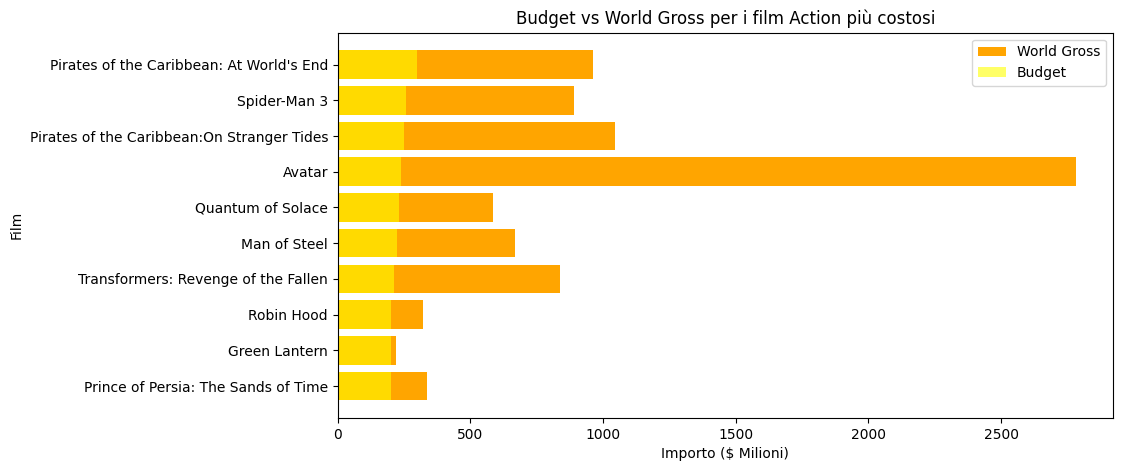

In [135]:
top_action_movies = action_movies.head(10)

# Creazione del grafico
plt.figure(figsize=(10, 5))
plt.barh(top_action_movies["Movie"], top_action_movies["WorldGross"], color="orange", label="World Gross")
plt.barh(top_action_movies["Movie"], top_action_movies["Budget"], color="yellow", alpha=0.6, label="Budget")

# Aggiungi titoli ed etichette
plt.xlabel("Importo ($ Milioni)")
plt.ylabel("Film")
plt.title("Budget vs World Gross per i film Action più costosi")
plt.legend()
plt.gca().invert_yaxis()  # Per avere il film più costoso in alto

plt.show()

## Voglio vedere i film Action con più alta `Profitability` (top 10):

In [105]:
## Top 10 per Profitability
# Filtra i film di genere Action e ordina per Profitability decrescente
top_action_movies = df[df["Genre"] == "Action"].sort_values(by="Profitability", ascending=False)

# Seleziona le prime 10 righe
top_10_action = top_action_movies.head(10)

# Mostra la top 10 con alcuni dati rilevanti
top_10_action[["Movie", "Budget", "WorldGross", "Profitability", "RottenTomatoes", "AudienceScore"]]

,Movie,Budget,WorldGross,Profitability,RottenTomatoes,AudienceScore
239,Avatar,237.0,2781.500,1173.63,83.0,92.0
258,Taken,25.0,226.800,907.20,58.0,83.0
480,The Karate Kid,40.0,359.120,897.80,66.0,75.0
257,Paul Blart: Mall Cop,26.0,183.280,704.92,33.0,50.0
265,District 9,30.0,210.770,702.57,91.0,81.0
9,300,65.0,456.070,701.64,60.0,90.0
128,Cloverfield,25.0,170.760,683.05,77.0,67.0
463,Skyline,10.0,66.817,668.17,16.0,19.0
825,THG: Catching Fire,130.0,855.900,658.38,90.0,92.0
204,The Spirit,6.0,39.030,650.52,14.0,29.0


## Plotto la tabella per vedere graficamente e mi aspetterei di vedere tutti incassi molto alti rispetto al budget

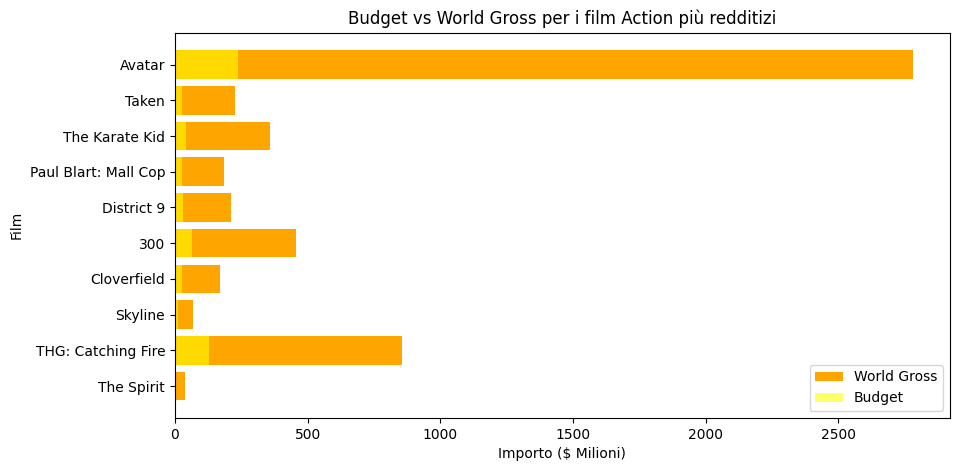

In [136]:
plt.figure(figsize=(10, 5))
plt.barh(top_10_action["Movie"], top_10_action["WorldGross"], color="orange", label="World Gross")
plt.barh(top_10_action["Movie"], top_10_action["Budget"], color="yellow", alpha=0.6, label="Budget")

# Aggiungi titoli ed etichette
plt.xlabel("Importo ($ Milioni)")
plt.ylabel("Film")
plt.title("Budget vs World Gross per i film Action più redditizi")
plt.legend()
plt.gca().invert_yaxis()  # Per avere il più redditizio in alto

plt.show()

## Critiche del pubblico e critici ufficiali per i film d'azione

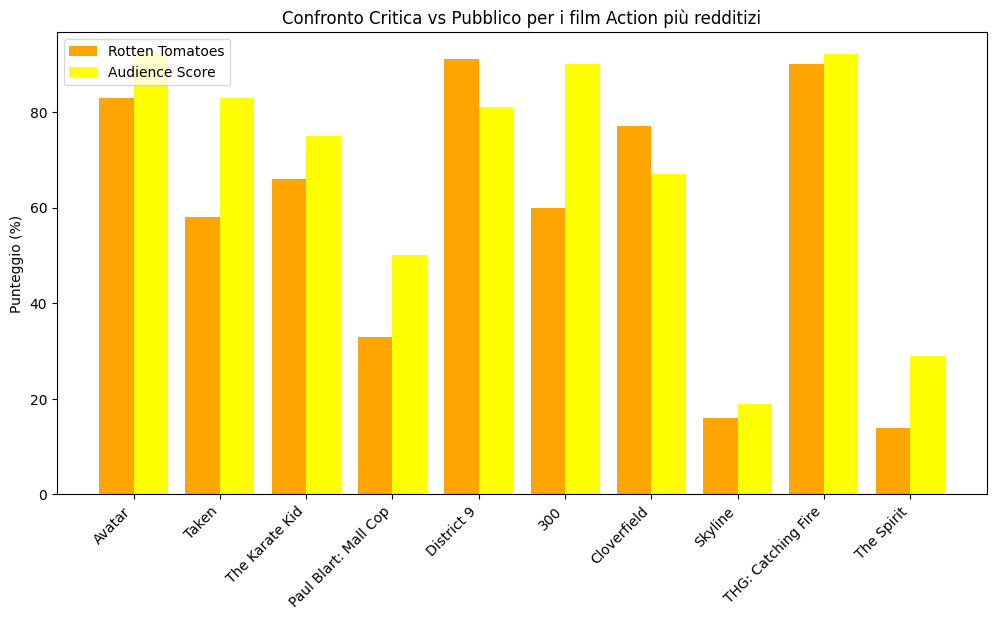

In [134]:
import numpy as np

# Imposta la posizione delle barre
x = np.arange(len(top_10_action["Movie"]))  

# Creazione del grafico
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, top_10_action["RottenTomatoes"], width=0.4, color="orange", label="Rotten Tomatoes")
plt.bar(x + 0.2, top_10_action["AudienceScore"], width=0.4, color="yellow", label="Audience Score")

# Etichette e titolo
plt.xticks(x, top_10_action["Movie"], rotation=45, ha="right")
plt.ylabel("Punteggio (%)")
plt.title("Confronto Critica vs Pubblico per i film Action più redditizi")
plt.legend()

# Mostra il grafico
plt.show()

# Quanto hanno guadaganto i film? per qualsiasi genere
* 📌 Grafico: Barre per vedere il film con maggiori incassi (top20)

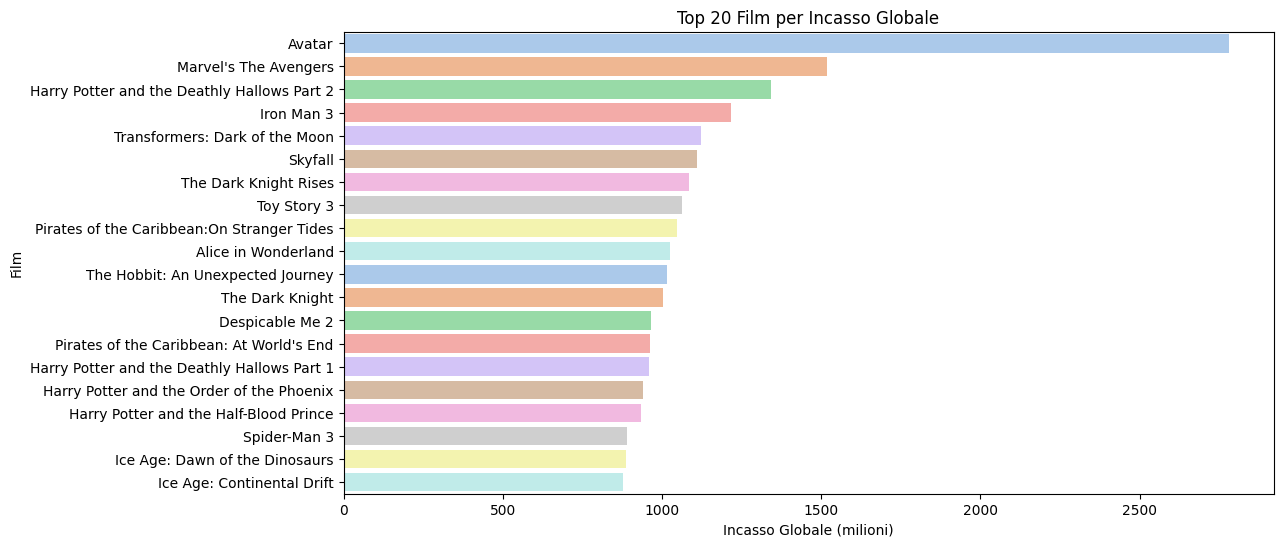

In [124]:
plt.figure(figsize=(12, 6))
top_movies = df.sort_values("WorldGross", ascending=False).head(20)
sns.barplot(data=top_movies, x="WorldGross", y="Movie", hue="Movie", palette="pastel")

plt.title("Top 20 Film per Incasso Globale")
plt.xlabel("Incasso Globale (milioni)")
plt.ylabel("Film")
plt.show()

## Focus Avart
Per **Avatar** che è il film con maggiore uncasso in assoluto, voglio vedere le critiche:


In [71]:
avatar = df[df['Movie'] == 'Avatar']
avatar



,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year,ScoreDifference
239,Avatar,Fox,83.0,92.0,Metamorphosis,Action,3452.0,77.0,22313.0,760.5,2021.0,2781.5,237.0,1173.63,32.49,2009,9.0


#### Confronto delle critiche, provo il grafico a torta:

Nel grafico a torta il paramentro `autopct='%1.1f%%'` calcola automaticamente le proporzioni e le visualizza come percentuali sul grafico.

$\text{Proporzione} = \frac{\text{Valore della sezione}}{\text{Somma totale dei valori}}$

Nel caso specifico di Avatar:
* Il punteggio di Rotten Tomatoes è 83 (esempio).
* Il punteggio del pubblico è 92 (esempio).

La somma totale dei due punteggi sarà:


$\text{Somma totale} = \text{Rotten Tomatoes} + \text{Audience Score} = 83 + 92 = 175$


Le proporzioni per ciascun punteggio saranno:
* Proporzione di Rotten Tomatoes =  $\frac{83}{175} $
* Proporzione del Audience Score =  $\frac{92}{175} $



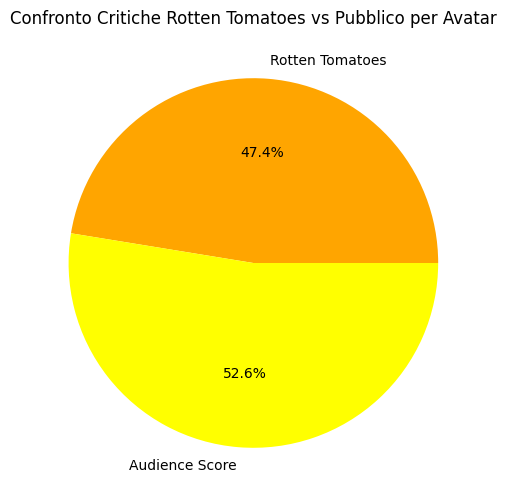

In [90]:
# Dati del film Avatar
rotten_score = avatar['RottenTomatoes'].values[0]
audience_score = avatar['AudienceScore'].values[0]

# Etichette e valori per il grafico
labels = ['Rotten Tomatoes', 'Audience Score']
scores = [rotten_score, audience_score]

# Creazione del grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(scores, labels=labels, autopct='%1.1f%%', colors=['orange', 'yellow'])



# Aggiungi titolo
plt.title('Confronto Critiche Rotten Tomatoes vs Pubblico per Avatar')

# Mostra il grafico
plt.show()

In [137]:
#### Confronto incassi opening weekend e Theater Open Week:

# Estraggo i dati specifici per Avatar
opening_weekend = avatar['OpeningWeekend'].values[0]
theaters_open_week = avatar['TheatersOpenWeek'].values[0]

# Printo i risultati
print(f"Opening Weekend: ${opening_weekend} milioni")
print(f"Theaters Open in Opening Week: {theaters_open_week} sale")

Opening Weekend: $77.0 milioni
Theaters Open in Opening Week: 3452.0 sale


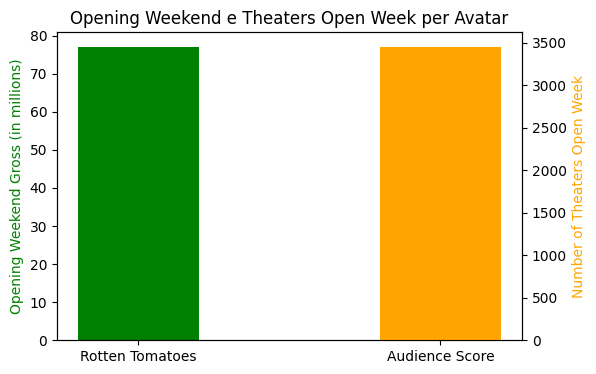

In [92]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# Primo asse y per Opening Weekend (valori in milioni)
ax1.bar(labels[0], opening_weekend, color='green', label='Opening Weekend', width=0.4)
ax1.set_ylabel('Opening Weekend Gross (in millions)', color='green')

# Secondo asse y per Theaters Open Week (numero di sale)
ax2 = ax1.twinx()
ax2.bar(labels[1], theaters_open_week, color='orange', label='Theaters Open Week', width=0.4)
ax2.set_ylabel('Number of Theaters Open Week', color='orange')

# Titolo
plt.title('Opening Weekend e Theaters Open Week per Avatar')

# Mostra il grafico
plt.show()

## Differenza tra critici e pubblico per tutti i film (RottenTomatoes vs. AudienceScore)
Grafico a dispersione (scatter plot) che confronta i punteggi di Rotten Tomatoes (critici) e di AudienceScore (pubblico) per ogni film, con il budget che influenza sia il colore che la dimensione dei punti.

* **Relazione tra critica e pubblico**: Se i punti sono allineati lungo una diagonale (da sinistra a destra), significa che critici e pubblico hanno valutato in modo simile i film. Se i punti si disperdono molto tra l’asse X e l’asse Y, potrebbe significare che c’è una discrepanza tra la valutazione dei critici e quella del pubblico.
* **Effetto del budget**:
	* Se vedi che i film con budget alto tendono ad avere punteggi migliori da parte della critica o del pubblico, potrebbe indicare che un alto investimento porta a un prodotto più apprezzato.
	* Se i punti grandi (alta dimensione) sono distribuiti in modo uniforme tra alti e bassi punteggi, potrebbe suggerire che un grande budget non garantisce necessariamente un buon risultato dal punto di vista delle recensioni.
* Cluster di punti: Se noti gruppi di punti concentrati in una specifica area (ad esempio, budget medio con alti punteggi sia da parte della critica che del pubblico), potrebbe indicare che quella fascia di budget è particolarmente apprezzata.

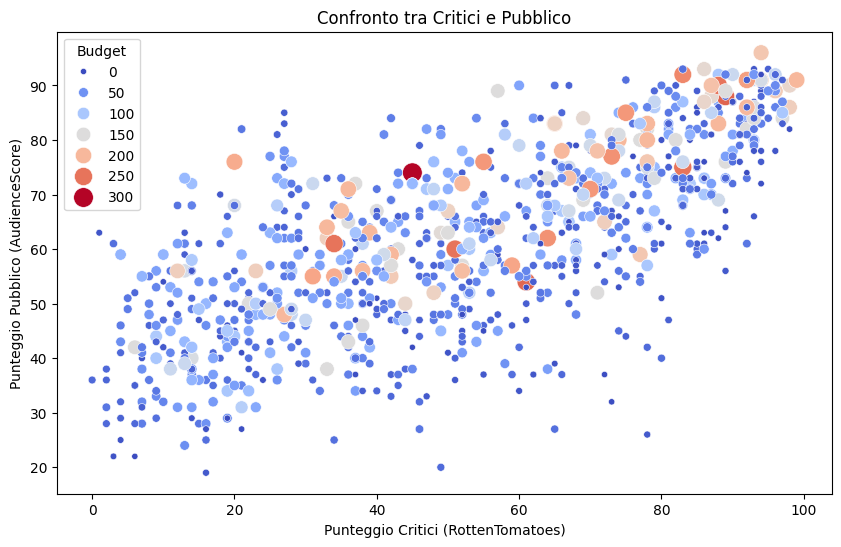

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="RottenTomatoes", y="AudienceScore", hue="Budget", size="Budget", sizes=(20, 200), palette="coolwarm")

plt.xlabel("Punteggio Critici (RottenTomatoes)")
plt.ylabel("Punteggio Pubblico (AudienceScore)")
plt.title("Confronto tra Critici e Pubblico")
plt.legend(title="Budget")
plt.show()